In [1]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
import matplotlib
from matplotlib import pyplot as plt

from sklearn.metrics import r2_score

# input file path
datasetdir = "D://indivdual_models//Dataset//2022_EC11K_single_drug"
resultdir = "D://indivdual_models//Result//Model_generation//2022_EC11K_single_drug"

In [2]:
drug_list = ["AEW541","Nilotinib","17-AAG","PHA-665752","Lapatinib","Nutlin-3"
            ,"AZD0530","PF2341066","L-685458","ZD-6474","Panobinostat","Sorafenib"
            ,"Irinotecan","Topotecan","LBW242","PD-0325901","PD-0332991","Paclitaxel"
            ,"PLX4720","RAF265","TAE684","TKI258","Erlotinib","AZD6244"]

Starttime: 20221007
AEW541_//n
train_X shape: (392, 18988)
392 train samples
98 test samples
StartTime : 2022-10-07 15:40:04.625541
EndTime : 2022-10-07 15:49:33.504580
AEW541’s final rmse value is = 0.807750
AEW541 R-squared value is = -0.027804
Nilotinib_//n
train_X shape: (326, 18988)
326 train samples
81 test samples
StartTime : 2022-10-07 15:49:33.988286
EndTime : 2022-10-07 15:57:32.010389
Nilotinib’s final rmse value is = 0.600805
Nilotinib R-squared value is = -0.199015
17-AAG_//n
train_X shape: (392, 18988)
392 train samples
98 test samples
StartTime : 2022-10-07 15:57:32.729101
EndTime : 2022-10-07 16:01:56.050758
17-AAG’s final rmse value is = 1.159379
17-AAG R-squared value is = 0.269887
PHA-665752_//n
train_X shape: (392, 18988)
392 train samples
98 test samples
StartTime : 2022-10-07 16:01:56.470273
EndTime : 2022-10-07 16:06:50.740545
PHA-665752’s final rmse value is = 0.835875
PHA-665752 R-squared value is = 0.007763
Lapatinib_//n
train_X shape: (393, 18988)
393 train s

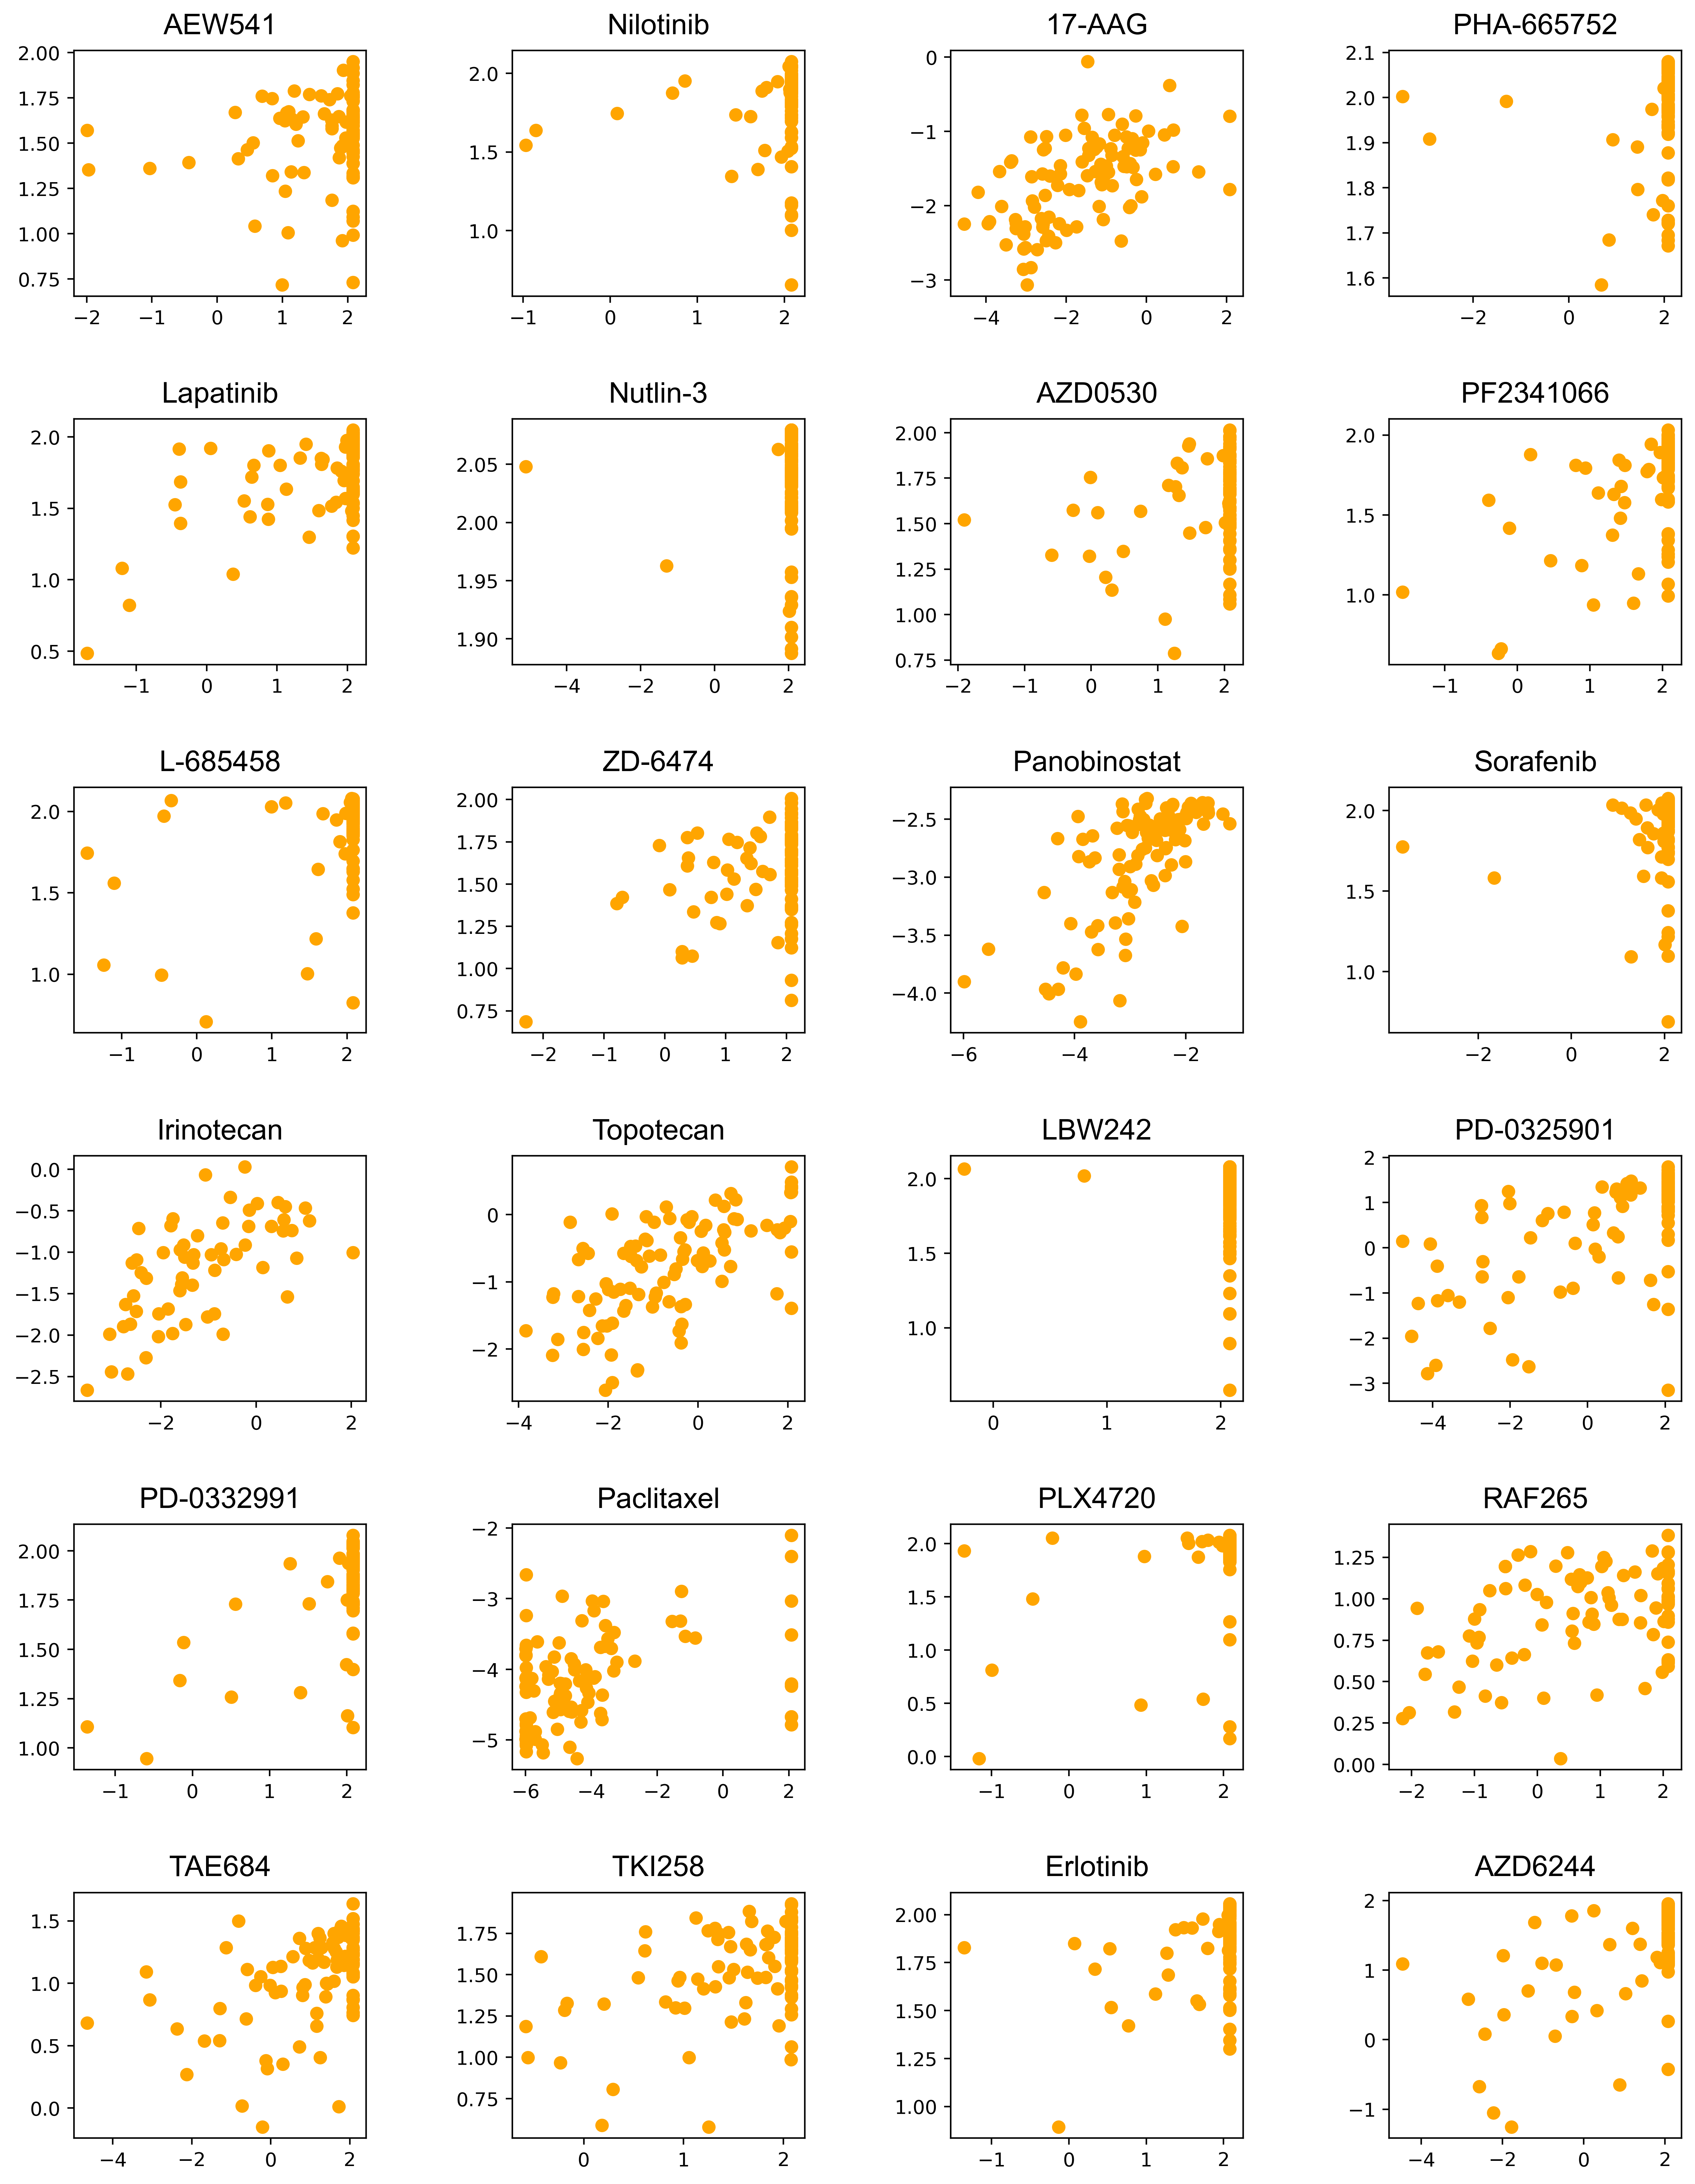

In [3]:
from datetime import datetime
now = datetime.now()
day = now.strftime("%Y%m%d")
print("Starttime: " + day)

rmselist = []
r2list = []

# drug_list = ["Topotecan"]
fig = plt.figure(figsize=(15,20),dpi=400)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
num = 1
for dname in drug_list:
    
    print('%s_//n' % dname)
    # read input file and index file for training and test set
    dataset = np.load(datasetdir + "//EC11K_%s.npz" % dname)
    ss0 = np.load(datasetdir + '//EC11K_%s_0_8_2.npz' % dname)

    # input and index file assign
    x = dataset['x']
    y = dataset['y']
    # y_linear = dataset['y_lnIC50']
    ss0_train = ss0['train']
    ss0_test = ss0['test']
    
    # z-normalization
    
    # training and test dataset assign
    train_X, train_y = x[ss0_train], y[ss0_train]
    test_X, test_y = x[ss0_test], y[ss0_test]
    
    from sklearn import preprocessing
    import pickle
    scaler = preprocessing.StandardScaler()
    train_X = scaler.fit_transform(train_X)
    pickle.dump(scaler, open(datasetdir + "//standardization_models//znorm_scaler_%s.pkl" % dname, 'wb'))
    test_X = scaler.transform(test_X)

    # data typing and the number of dataset
    train_X = train_X.astype('float32')
    test_X = test_X.astype('float32')
    # train_X /= 255
    # test_X /= 255
    print('train_X shape:', train_X.shape)
    print(train_X.shape[0], 'train samples')
    print(test_X.shape[0], 'test samples')
    
    
    # model fitting
    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)
    rf = RandomForestRegressor(random_state = 84)
    # Train the model on training data
    rf.fit(train_X, train_y)

    EndTime8 = datetime.now()
    print("EndTime :", EndTime8)


    predicted_classes = rf.predict(test_X)
    predicted_value = predicted_classes
        
        
    import pickle
    import joblib
    joblib.dump(rf, resultdir + '//RF//EC11K_znorm_RF_%s.pkl' % dname) 
            
    
    # saving predicted ln(IC50)s and ln(IC50)s in the test set
    a = pd.DataFrame(predicted_value)
    b = pd.DataFrame(test_y)
    c = pd.concat([a,b], axis=1)
    c.columns=["Predicted","Test"]
    c.to_csv(resultdir + '//RF//predicted_table//EC11K_RF_%s_pred_and_val_result.csv' % dname, index=False)


    
    # RMSE
    rse = ((b[0]-a[0])**2).sum()
    mse = rse / len(b)
    rmse = np.sqrt(mse)
    print("%s’s final rmse value is = %f" % (dname,rmse))
    
    # R-squared value
    r2_value = r2_score(b,a)
    print("%s R-squared value is = %f" % (dname,r2_value))
    rmselist.append(rmse)
    r2list.append(r2_value)
          
    plt.subplot(6,4,num)
    plt.scatter(test_y,predicted_value,c='orange')
    plt.title(dname,fontdict ={'fontsize' : 15},fontname="Arial",y = 1.02)
    plt.tick_params(labelsize=10)
    
    num += 1
#     plt.scatter(test_y,predicted_value,c='red')
#     plt.xlabel('test_IC50_value')
#     plt.ylabel('predicted_IC50_value')
#     plt.savefig(workdir + '//%s_test_scatterplot.png' % dname)
    

figdir = "D://indivdual_models//Result//Figure"
plt.savefig(figdir +'//EC11K_single_drug_RF_plot.png', dpi=400)

In [4]:
num

25

In [5]:
a = pd.DataFrame(drug_list)
b = pd.DataFrame(rmselist)
c =pd.DataFrame(r2list)
result = pd.concat([a,b,c],axis=1)
result.columns = ['Drug','RMSE','R2value']

In [6]:
result

,Drug,RMSE,R2value
0,AEW541,0.807750,-0.027804
1,Nilotinib,0.600805,-0.199015
2,17-AAG,1.159379,0.269887
3,PHA-665752,0.835875,0.007763
4,Lapatinib,0.713576,0.257489
5,Nutlin-3,0.798058,-0.005691
6,AZD0530,0.706398,0.004916
7,PF2341066,0.572466,0.253890
8,L-685458,0.677991,0.178346
9,ZD-6474,0.748120,0.125217


In [7]:
result.to_csv(resultdir +'//EC11K_RF_24drugs_metrics.csv', index=False)